Demonstrate the steps to build a machine-learning model that predicts
the median housing price using the California housing price dataset.




1 Download the dataset :
https://media.geeksforgeeks.org/wp-
content/uploads/20240319120216/housing.csv
1. Perform the describe and info steps
2. Plot the histogram of each feature( Indicate what does histogram
indicate on median_income and house_median_age)
3. Demonstrate the process of creating a test set( write the difference
between random and stratified test set)
4. List the geographical features from the dataset and plot a graph to
Visualize Geographical Data(what does the graph indicate w.r.t
housing prices and location)
5. Plot a graph to show features correlation with housing price.
Which feature corelates to the maximum. Plot the graph for that
with housing price and analyze what the graph indicate
6. List the features that could be combined to improve correlation and
plot again to see if correlation has improved
7. List the features that needs to be cleaned and demonstrate the
process of cleaning
8. Is there any categorical data that needs to be converted to
numerical? If so explain the method used to convert and code the
same and show the output.
9. Discuss the importance of feature scaling
10. Design a pipeline inculcating (Custom transform, feature
scaling and encoding). Explain how it works

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##1)Perform the describe and info steps



In [ ]:
import pandas as pd

housing = pd.read_csv("/content/drive/MyDrive/MLlab dataset/housing10112025.csv")
print(housing.info())
print(housing.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952

##2)Plot the histogram of each feature( Indicate what does histogram indicate on median_income and house_median_age)

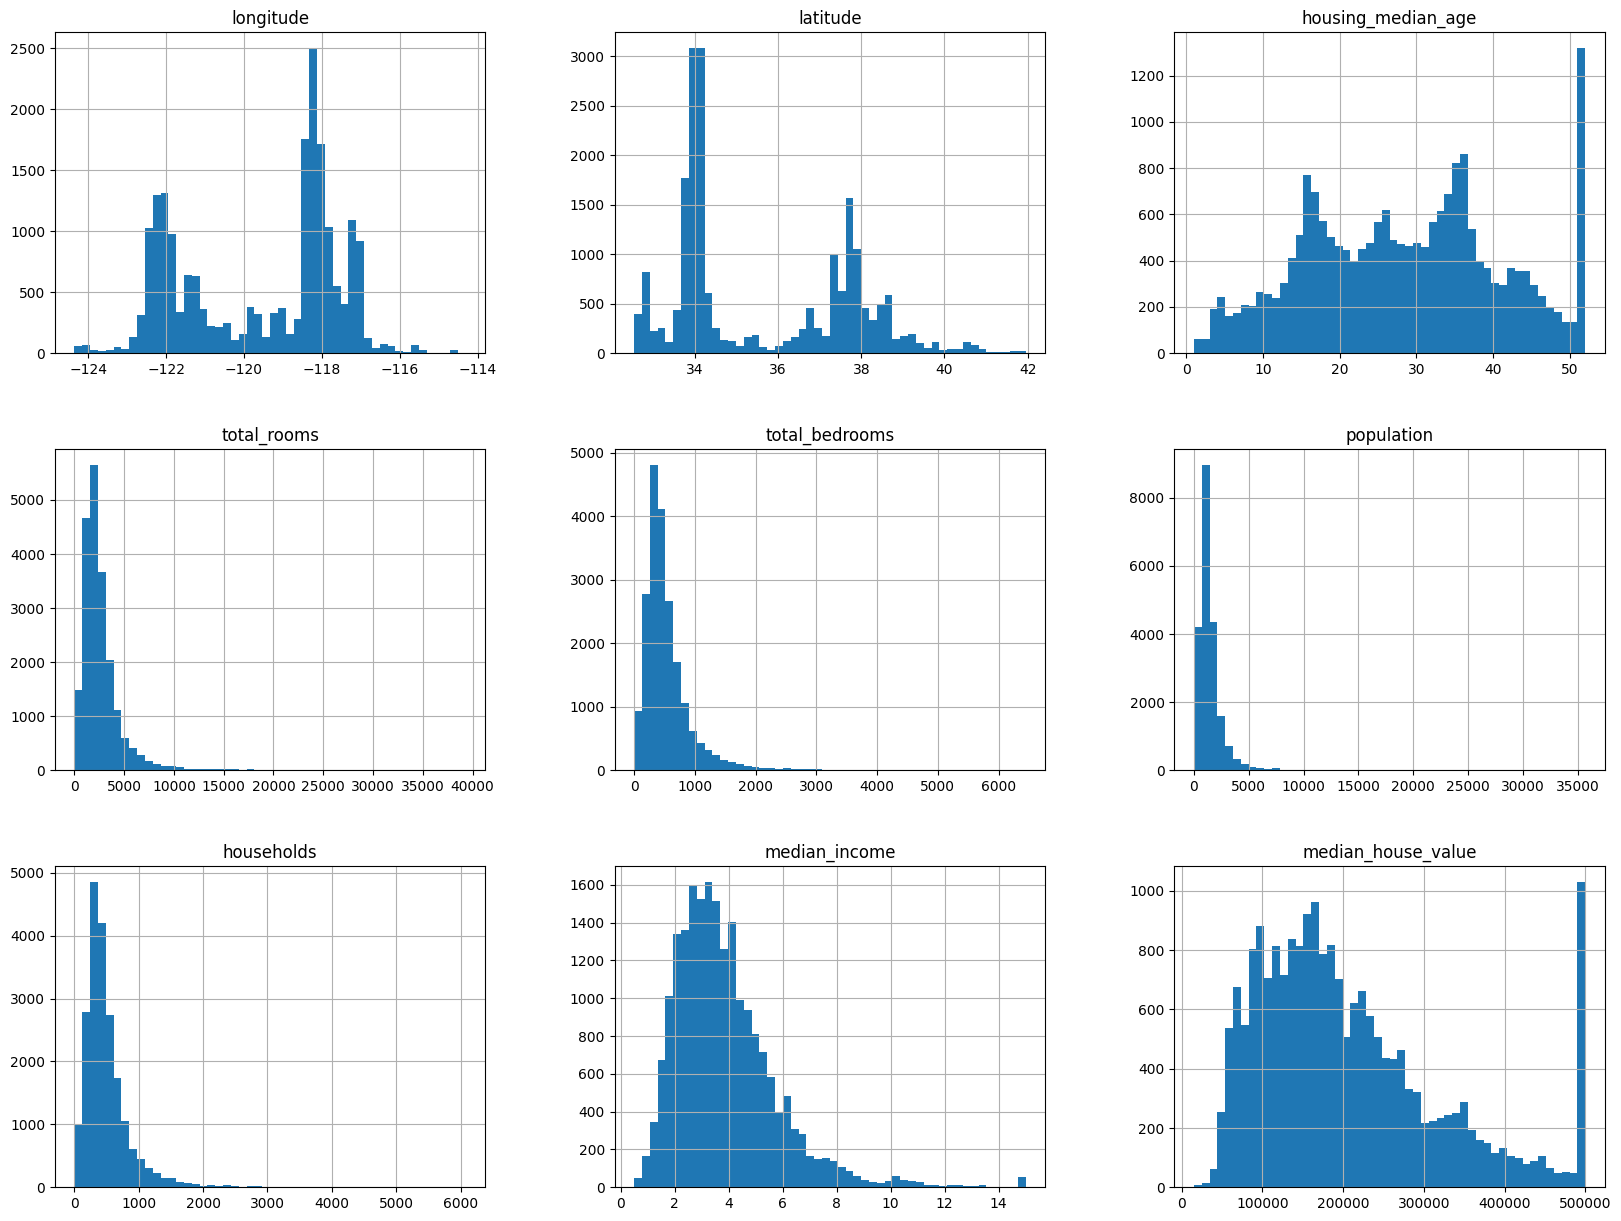

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram for each feature
housing.hist(bins=50, figsize=(20, 15))
plt.show()


The histograms for median_income and house_median_age can give us insights into the distribution of these features. For example, median_income might show a right-skewed distribution, indicating that most households have lower median incomes, while house_median_age might show how the ages of houses are distributed

##3)Demonstrate the process of creating a test set( write the difference between random and stratified test set)

## random sampling

In [ ]:
from sklearn.model_selection import train_test_split


train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(len(train_set))
print(len(test_set))


16512
4128


 comparison between Random and Stratified Test Sets in tabular form:

| Feature             | Random Test Set                                  | Stratified Test Set                               |
|---------------------|--------------------------------------------------|--------------------------------------------------|
| **Definition**      | Splits the data randomly into training and testing sets. | Ensures the training and testing sets are representative of the overall distribution of a particular feature. |
| **Data Distribution** | May not preserve the distribution of key features in training and testing sets. | Preserves the distribution of key features (e.g., income levels) across the training and testing sets. |
| **Bias**            | May introduce bias due to uneven feature distribution. | Reduces bias by maintaining consistent feature distribution. |
| **Use Case**        | Suitable for general datasets without specific feature distribution requirements. | Suitable for datasets with significant feature distributions that need to be maintained. |



stratified approach

In [ ]:
from sklearn.model_selection import train_test_split


X = housing.drop(['median_house_value'], axis=1)
y = housing['median_house_value']



train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42, stratify=housing['ocean_proximity'])

proper approach

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets using random sampling
train_set_random, test_set_random = train_test_split(housing, test_size=0.2, random_state=42)


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np
# Create a new column 'income_cat' to stratify by
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

# Use StratifiedShuffleSplit to create training and testing sets
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

# Drop the 'income_cat' column to return to the original state
for set_ in (strat_train_set, strat_test_set):
    set_.drop(["income_cat"], axis=1, inplace=True)


##4)List the geographical features from the dataset and plot a graph to Visualize Geographical Data(what does the graph indicate w.r.t housing prices and location)

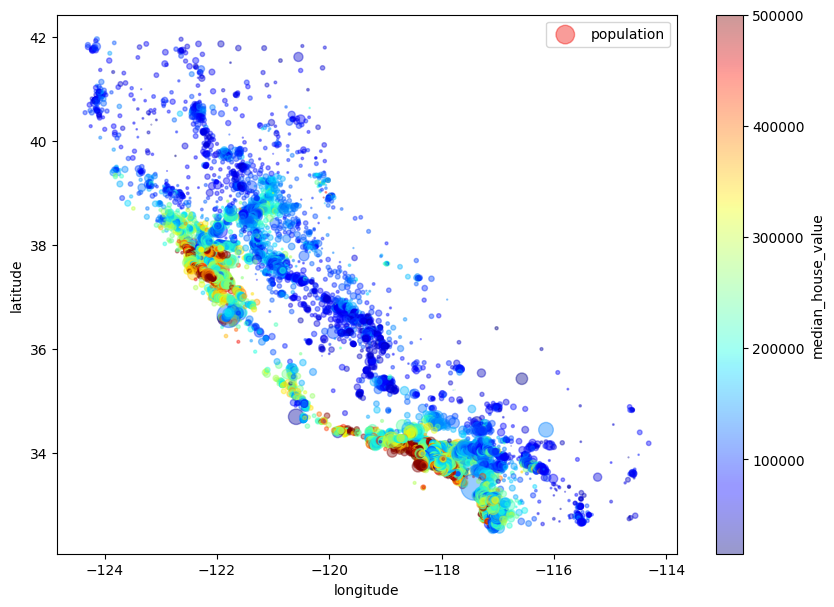

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
plt.show()


This graph visualizes housing prices in relation to their geographic locations, with the color representing the median house value and the size of the circle representing the population.

##6)Plot a graph to show features correlation with housing price. Which feature corelates to the maximum. Plot the graph for that with housing price and analyze what the graph indicate

median_house_value    1.000000
median_income         0.688075
income_cat            0.643892
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


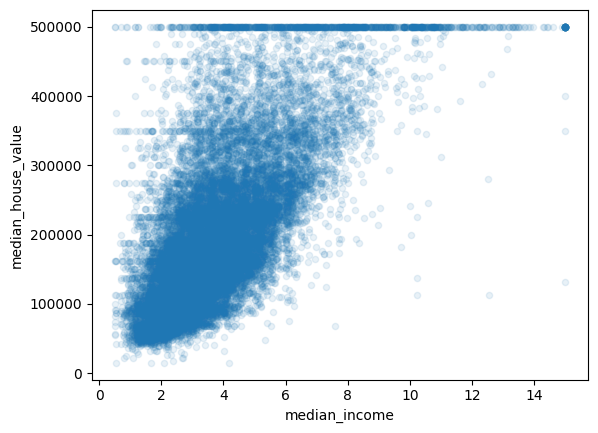

In [ ]:
# Drop the 'ocean_proximity' column
housing_num = housing.drop("ocean_proximity", axis=1)

# Calculate and print correlation matrix
corr_matrix = housing_num.corr()
print(corr_matrix["median_house_value"].sort_values(ascending=False))

# Plot the correlation between 'median_income' and 'median_house_value'
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
plt.show()


median_income usually shows the highest correlation with the median house value.

##7)List the features that could be combined to improve correlation and plot again to see if correlation has improved

In [ ]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]


In [ ]:
# Drop the 'ocean_proximity' column for correlation calculation
housing_num = housing.drop("ocean_proximity", axis=1)

# Calculate the new correlation matrix
corr_matrix = housing_num.corr()

# Print the sorted correlations with 'median_house_value'
print(corr_matrix["median_house_value"].sort_values(ascending=False))




median_house_value     1.000000
median_income          0.688075
income_cat             0.643892
rooms_per_household    0.151948
total_rooms            0.134153
housing_median_age     0.105623
households             0.065843
total_bedrooms         0.049686
population            -0.024650
longitude             -0.045967
latitude              -0.144160
bedrooms_per_room     -0.255880
Name: median_house_value, dtype: float64


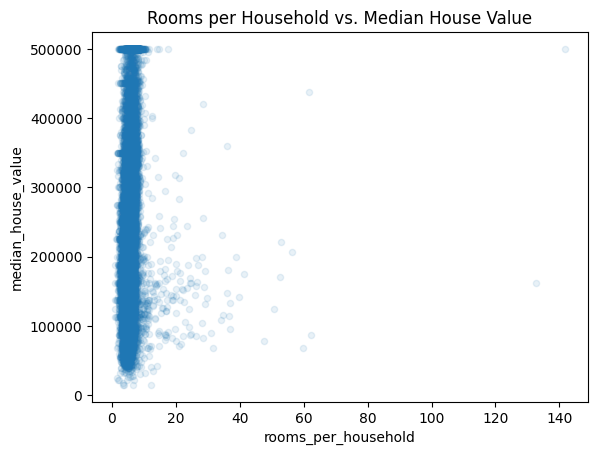

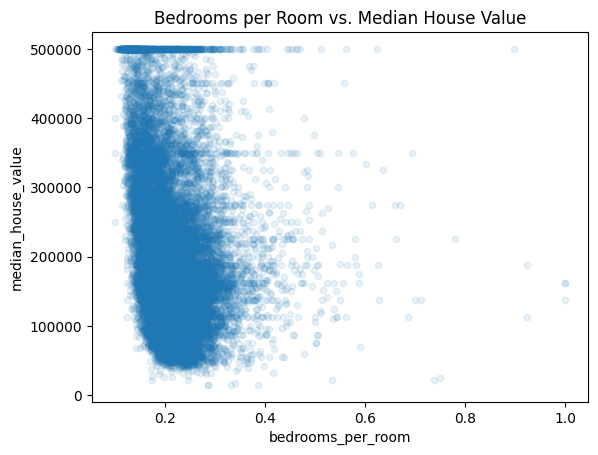

In [ ]:
import matplotlib.pyplot as plt

# Plot 'rooms_per_household' vs. 'median_house_value'
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value", alpha=0.1)
plt.title("Rooms per Household vs. Median House Value")
plt.show()

# Plot 'bedrooms_per_room' vs. 'median_house_value'
housing.plot(kind="scatter", x="bedrooms_per_room", y="median_house_value", alpha=0.1)
plt.title("Bedrooms per Room vs. Median House Value")
plt.show()


Analysis
By creating the rooms_per_household and bedrooms_per_room features, we can observe whether the correlation with the median house value has improved. Here are some points to consider during the analysis:

Rooms per Household: A higher rooms_per_household ratio might indicate larger homes, which could be positively correlated with higher house values.

Bedrooms per Room: A lower bedrooms_per_room ratio might indicate a higher number of non-bedroom spaces, which could also be indicative of more valuable homes.

By analyzing the new correlation matrix and the scatter plots, you should be able to determine if these combined features have improved the correlation with median_house_value.

##7)List the features that needs to be cleaned and demonstrate the process of cleaning

In [ ]:
# Checking the column names
print(housing.columns)

# Assuming 'total_bedrooms' is present and the correct name
if "total_bedrooms" in housing.columns:
    # Option 1: Drop rows with missing values in 'total_bedrooms'
    housing.dropna(subset=["total_bedrooms"], inplace=True)

    # Option 2: Drop the 'total_bedrooms' column entirely
    housing.drop("total_bedrooms", axis=1, inplace=True)

    # Option 3: Fill missing values in 'total_bedrooms' with the median value
    housing["total_bedrooms"].fillna(housing["total_bedrooms"].median(), inplace=True)
else:
    print("Column 'total_bedrooms' not found in the dataset.")


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity', 'income_cat', 'rooms_per_household',
       'bedrooms_per_room'],
      dtype='object')
Column 'total_bedrooms' not found in the dataset.


##Output the Corrected Data

In [ ]:
print(housing.head())


   longitude  latitude  housing_median_age  total_rooms  population  \
0    -122.23     37.88                41.0        880.0       322.0   
1    -122.22     37.86                21.0       7099.0      2401.0   
2    -122.24     37.85                52.0       1467.0       496.0   
3    -122.25     37.85                52.0       1274.0       558.0   
4    -122.25     37.85                52.0       1627.0       565.0   

   households  median_income  median_house_value ocean_proximity income_cat  \
0       126.0         8.3252            452600.0        NEAR BAY          5   
1      1138.0         8.3014            358500.0        NEAR BAY          5   
2       177.0         7.2574            352100.0        NEAR BAY          5   
3       219.0         5.6431            341300.0        NEAR BAY          4   
4       259.0         3.8462            342200.0        NEAR BAY          3   

   rooms_per_household  bedrooms_per_room  
0             6.984127           0.146591  
1         

9. Convert Categorical Data to Numerical

In [ ]:
from sklearn.preprocessing import OneHotEncoder

housing_cat = housing[["ocean_proximity"]]
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat)
print(housing_cat_1hot.toarray())


[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


10. Importance of Feature Scaling
Feature scaling is crucial to ensure that all features contribute equally to the result. Techniques include StandardScaler and MinMaxScaler.

11. Design a Pipeline